In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
from math import sqrt
import ipywidgets as ipyw
%matplotlib inline

In [2]:
def estimate_pi(n_itt):
    '''
    This function takes in an integer as input. It generates input number of points
    to estimate value of pi, using a square inscribed by a circle and comparing the
    number of points within the circle and totol.
    Area of circle = π * r * r
    Area of a square 'tangent' to the circle is = 4 * r * r
    
    This code and idea is nicked from https://github.com/drJAGartner/pi_day
    '''
    
    n_in = 0.
    for j in xrange(n_itt):
        x = random.random()
        y = random.random()
        r = sqrt(x*x+y*y)
        if r <=1:
            n_in = n_in + 1.
            
    return 4.*n_in/float(n_itt)

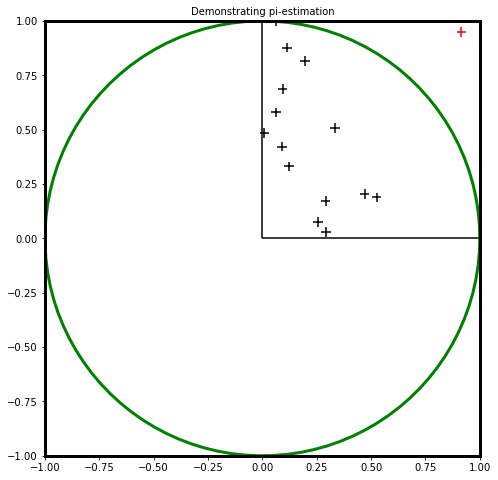

In [3]:
# This cell is just to draw a circle inscribing a square; with radius 1 unit; and highlight a quarter of the 
# sqaure and the circle. Black points are random points, that lie within the circle; red are also generated 
# randomly, those are the ones that are within the square but are outside the circle. There are 15 points in all.

an = np.linspace(0, 2*np.pi, 100)
plt.rc('axes', linewidth=3)
plt.figure(figsize = (8,8))

xa = []
ya = []
col = []
for i in xrange(15):
    x = random.random()
    xa.append(x)
    y = random.random()
    ya.append(y)
    if sqrt(x*x + y*y) <= 1:
        c = 'k'
    else: 
        c = 'r'
    col.append(c)
    
plt.axis([-1, 1, -1, 1])

plt.scatter(xa, ya, c=col, marker='+', s = 90)
plt.vlines(0.0, 0.0, 1)
plt.hlines(0.0, 0.0, 1)

plt.plot(np.cos(an), np.sin(an), linewidth=3, c='g')
plt.gca().set_aspect('equal')
plt.title('Demonstrating pi-estimation', fontsize=10)

plt.savefig('images/idea.png')

plt.show()

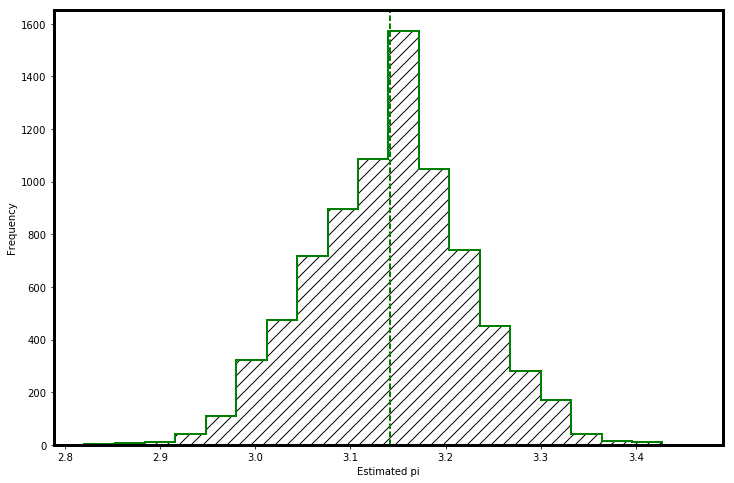

In [4]:
def pi_dist(num_pi, num_pts):
    '''
    This number returns an array of estimated values of pi. The len of the array is num_pi.
    The function uses num_pts number of points for each estimation of pi.
    '''
    pi = []
    for i in xrange(num_pi):
        pi.append(estimate_pi(num_pts))
    return pi

def plot_hist(num_pi, num_pts):
    plt.figure(2, figsize=(12, 8))
    plt.xlabel("Estimated pi")
    plt.ylabel("Frequency")
    plt.axvline(x=np.pi, color='g', linestyle='dashed', label="pi", linewidth=2)

    plt.hist(pi_dist(num_pi, num_pts), bins=20, color='g', histtype='step', hatch="//", linewidth=2)
    plt.show() 
    
ipyw.interactive(plot_hist, num_pi = (1000, 10000, 1000), num_pts=(100, 500, 50))

# The three numbers in the line above are min, max and stepsize.

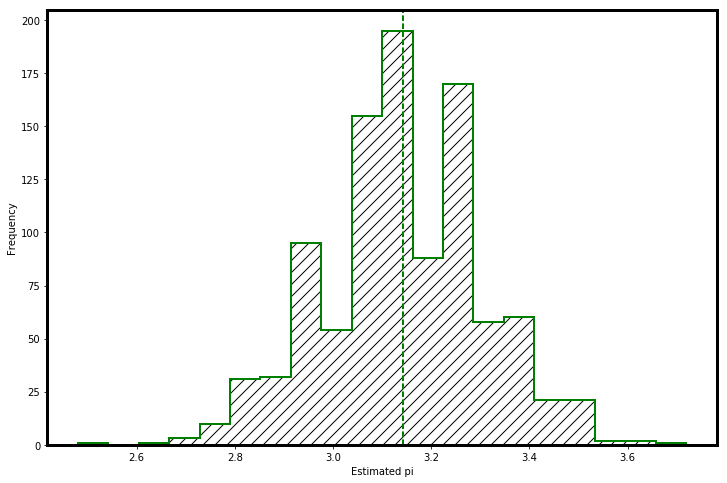

In [5]:
plt.figure(figsize=(12, 8))
pi_arr = pi_dist(1000, 100)
plt.xlabel("Estimated pi")
plt.ylabel("Frequency")
plt.axvline(x=np.pi, color='g', linestyle='dashed', label="pi", linewidth=2)
plt.hist(pi_arr, bins=20, color='g', histtype='step', hatch="//", linewidth=2)
plt.show()

Below is the demonstration of the Central Limit Theorem, CLT. The idea is that the distribution of pi is used, which is Gaussian anyway. We use 1000 values of pi; draw sample_size number of values from that every time; calculate their mean; and repeat this process for num_sample number of times. 

A gaussian is fitted to this distribution to illustrate CLT.

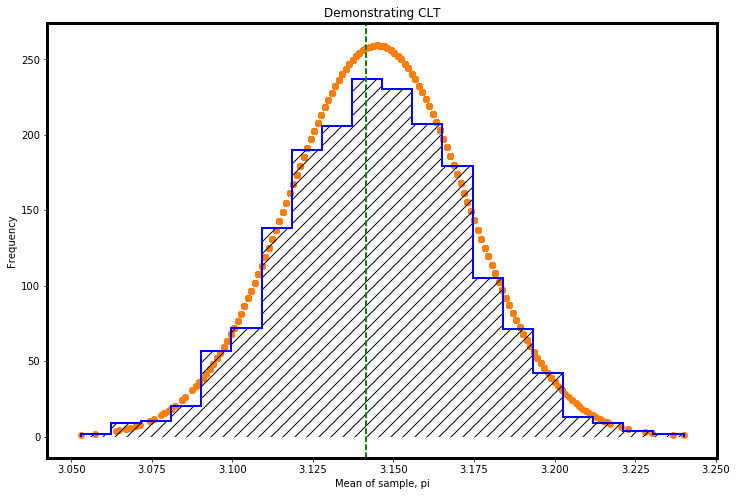

In [6]:
def clt(num_sample, sample_size):
    plt.figure(2, figsize=(12, 8))
    mean_sample_pi = []
    plt.axvline(x=np.pi, color='g', linestyle='dashed', label="pi", linewidth=2)
    for i in xrange(num_sample):
        indices = np.random.randint(0, 999, sample_size)
        total = 0
        for index in indices:
            total += pi_arr[index]
        mean_sample_pi.append(total/sample_size)
    plt.hist(mean_sample_pi, bins=20, color='b', histtype='step', hatch="//", linewidth=2)
    pi_mean = np.mean(mean_sample_pi)
    pi_std = np.std(mean_sample_pi)
    pdf = num_sample * stats.norm.pdf(mean_sample_pi, pi_mean, pi_std) / 100 
    plt.scatter(mean_sample_pi, pdf)
    plt.xlabel('Mean of sample, pi')
    plt.ylabel('Frequency')
    plt.title('Demonstrating CLT')
    plt.show() 
    
ipyw.interactive(clt, num_sample = (100, 2000), sample_size=(3, 50))